# 3.4 Classifying Movie Reviews: A Binary Classification Example

This notebook explores a classic binary classification problem: classifying movie reviews as either positive or negative. We will use the IMDB dataset, a widely used benchmark for text classification tasks.

## Topics Covered:

*   The IMDB dataset
*   Preparing the data
*   Building your network
*   Validating your approach
*   Using a trained network to generate predictions on new data

## 1. The IMDB Dataset

*   The IMDB dataset consists of 50,000 movie reviews from the Internet Movie Database.
*   These reviews are split into 25,000 for training and 25,000 for testing.
*   Each set contains 12,500 positive and 12,500 negative reviews, making it a balanced dataset.
*   The data is preprocessed, with each review represented as a sequence of integers, where each integer corresponds to a specific word in a dictionary.
*   The dataset is available through libraries like Keras.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 

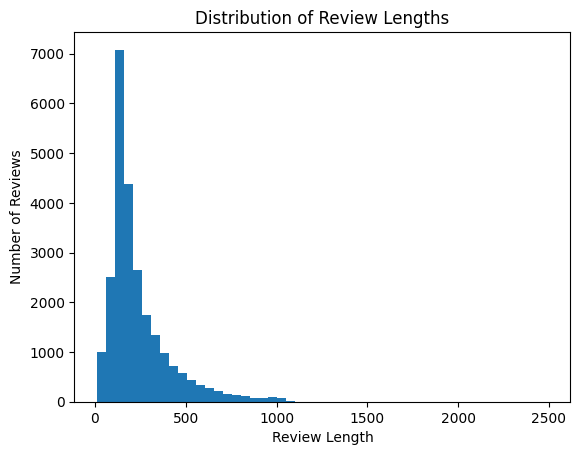

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded training data sample: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these 

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

# Load the dataset
# num_words=10000 keeps only the top 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# The data is a list of integers representing words
print("Training data sample:", train_data[0])
print("Training label sample:", train_labels[0]) # 1 for positive, 0 for negative

# Let's quickly visualize the distribution of review lengths
review_lengths = [len(review) for review in train_data]
print("Average review length:", np.mean(review_lengths))
print("Maximum review length:", np.max(review_lengths))

import matplotlib.pyplot as plt
plt.hist(review_lengths, bins=50)
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")
plt.show()

# To understand the integer encoding, let's get the word index
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review
# The indices are offset by 3 because 0, 1, and 2 are reserved indices
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("\nDecoded training data sample:", decoded_review)

## 2. Preparing the Data

*   The integer sequences representing reviews need to be converted into a format suitable for a neural network.
*   One common approach is **one-hot encoding** or **multi-hot encoding**, where we create a vector of size 10,000 (the number of words we kept).
*   For multi-hot encoding, each element in the vector corresponds to a word, and its value is 1 if the word is present in the review, and 0 otherwise.

Let $V$ be the vocabulary size (e.g., 10,000). For a review $r$, the multi-hot encoded vector $v$ of size $V$ is defined as:

$v_i = \begin{cases} 1 & \text{if word } i \text{ is in review } r \\ 0 & \text{otherwise} \end{cases}$

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorize the training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# The labels are already in a suitable format (0 or 1), but we can convert them to float32 for consistency.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("\nVectorized training data shape:", x_train.shape)
print("Vectorized training data sample:", x_train[0])
print("Vectorized training label sample:", y_train[0])


Vectorized training data shape: (25000, 10000)
Vectorized training data sample: [0. 1. 1. ... 0. 0. 0.]
Vectorized training label sample: 1.0


## 3. Building Your Network

*   We will build a simple neural network using Keras.
*   A stack of densely connected layers (`Dense`) with `relu` activation is a good starting point for this type of classification task.
*   The final layer should have a single unit with a `sigmoid` activation, which outputs a probability between 0 and 1, indicating the likelihood of the review being positive.

The structure of the network can be represented as:

Input -> Dense Layer (ReLU) -> Dense Layer (ReLU) -> Dense Layer (Sigmoid) -> Output

The `relu` activation function is defined as:

$f(x) = \max(0, x)$

The `sigmoid` activation function is defined as:

$\sigma(x) = \frac{1}{1 + e^{-x}}$

For a binary classification problem, we use **binary crossentropy** as the loss function. The binary crossentropy loss for a single sample with true label $y$ and predicted probability $\hat{y}$ is:

$L(y, \hat{y}) = - (y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}))$

We will use the **RMSprop optimizer** to update the network's weights during training.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Validating Your Approach

*   To monitor the model's performance during training and prevent overfitting, we will set aside a **validation set** from the training data.
*   We train the model on the remaining training data and evaluate it on the validation set after each epoch.

Let's split the original training data:

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6890 - loss: 0.6025 - val_accuracy: 0.8664 - val_loss: 0.3926
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8977 - loss: 0.3311 - val_accuracy: 0.8703 - val_loss: 0.3282
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9228 - loss: 0.2452 - val_accuracy: 0.8689 - val_loss: 0.3221
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9343 - loss: 0.1968 - val_accuracy: 0.8895 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9541 - loss: 0.1547 - val_accuracy: 0.8795 - val_loss: 0.3024
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9588 - loss: 0.1318 - val_accuracy: 0.8859 - val_loss: 0.2852
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9705 - loss: 0.1091 - val_accuracy: 0.8682 - val_loss: 0.3452
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9725 - loss: 0.0985 - val_accuracy: 0.8812 - v

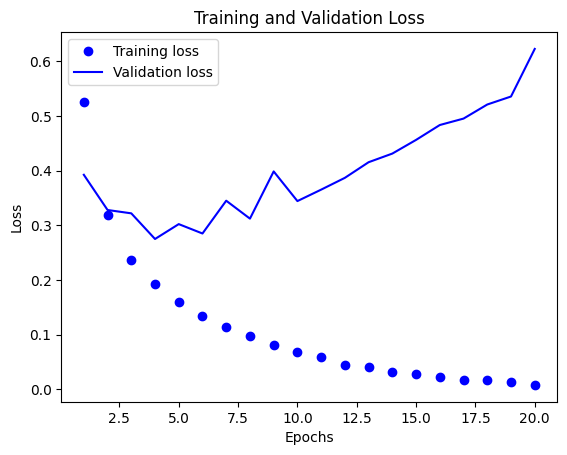

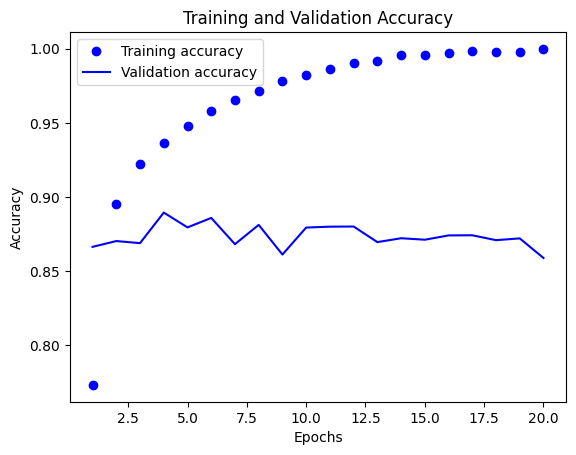

In [ ]:
# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Plot the training and validation loss and accuracy over epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.clf() # Clear the figure

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

*   From the plots, we can observe that the training loss decreases and training accuracy increases with each epoch.
*   However, the validation loss starts to increase and validation accuracy starts to decrease after a certain number of epochs (around 3-4 in this case). This indicates **overfitting**.
*   To combat overfitting, we should stop training when the validation performance starts to degrade. This is called **early stopping**.

Let's train a new model for fewer epochs:

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7012 - loss: 0.5920 - val_accuracy: 0.8629 - val_loss: 0.3901
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8958 - loss: 0.3326 - val_accuracy: 0.8862 - val_loss: 0.3084
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9232 - loss: 0.2417 - val_accuracy: 0.8830 - val_loss: 0.2927
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9391 - loss: 0.1906 - val_accuracy: 0.8893 - val_loss: 0.2743


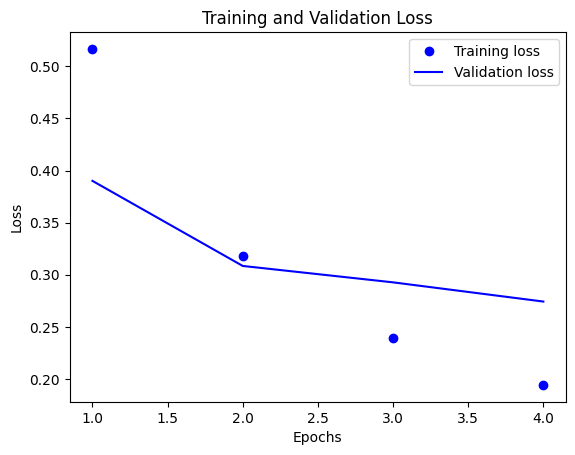

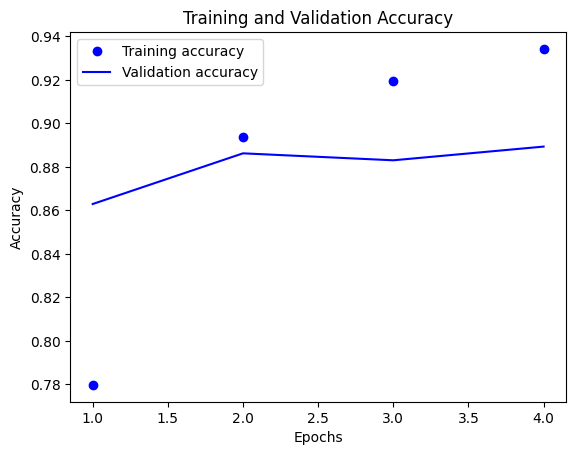

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8826 - loss: 0.2893

Test Loss: 0.2886684834957123
Test Accuracy: 0.8840000033378601


In [ ]:
# Retrain a new model from scratch for fewer epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4, # Reduced epochs
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Plot the training and validation loss and accuracy over epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.clf() # Clear the figure

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
results = model.evaluate(x_test, y_test)
print("\nTest Loss:", results[0])
print("Test Accuracy:", results[1])

*   The test accuracy is a better measure of how well the model generalizes to unseen data.

## 6. Using a Trained Network to Generate Predictions on New Data

*   Once the network is trained, you can use it to predict the sentiment of new movie reviews.
*   The `predict` method of the trained model will output the probability of the review being positive.

In [ ]:
# Example prediction on the first few test samples
predictions = model.predict(x_test[:10])
print("\nPredictions (probability of being positive):")
print(predictions)

# You can convert the probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype("int32")
print("\nBinary predictions:")
print(binary_predictions)

# Compare with the actual labels for these samples
print("\nActual labels:")
print(y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Predictions (probability of being positive):
[[0.24297845]
 [0.99908936]
 [0.8540774 ]
 [0.65663296]
 [0.9034844 ]
 [0.76648366]
 [0.99899745]
 [0.03453301]
 [0.9148548 ]
 [0.9849101 ]]

Binary predictions:
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]

Actual labels:
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]


## Summary and Conclusion

* The IMDB dataset is a balanced dataset of 50,000 movie reviews for binary sentiment classification.
* Reviews are represented as sequences of integers, which we vectorized using multi-hot encoding.
* A simple neural network with two dense layers and ReLU activation, followed by a dense layer with sigmoid activation, was built using Keras.
* Binary crossentropy was used as the loss function and RMSprop as the optimizer.
* A validation set was used to monitor performance and identify overfitting.
* Early stopping was applied by training the model for fewer epochs to prevent overfitting.
* The model achieved a test accuracy of approximately 88.4%.

This notebook demonstrated a basic approach to binary sentiment classification using a neural network on the IMDB dataset. We covered data preparation, model building, training, validation, and making predictions. The results show that even a simple network can achieve reasonable accuracy on this task. Further improvements could be explored by experimenting with different network architectures, hyperparameters, or text representation techniques (e.g., word embeddings).